# Import modules

In [6]:
import numpy as np
import superlink.geometry
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns

%matplotlib inline

In [7]:
superlink.geometry.geom_code

{'circular': 1,
 'elliptical': 7,
 'parabolic': 6,
 'rect_closed': 2,
 'rect_open': 3,
 'trapezoidal': 5,
 'triangular': 4}

In [8]:
circular = superlink.geometry.Circular
rect_closed = superlink.geometry.Rect_Closed
rect_open = superlink.geometry.Rect_Open
triangular = superlink.geometry.Triangular
trapezoidal = superlink.geometry.Trapezoidal
parabolic = superlink.geometry.Parabolic
elliptical = superlink.geometry.Elliptical

# Plot hydraulic geometry relations

In [9]:
h = np.linspace(0, 1.2, 50000)

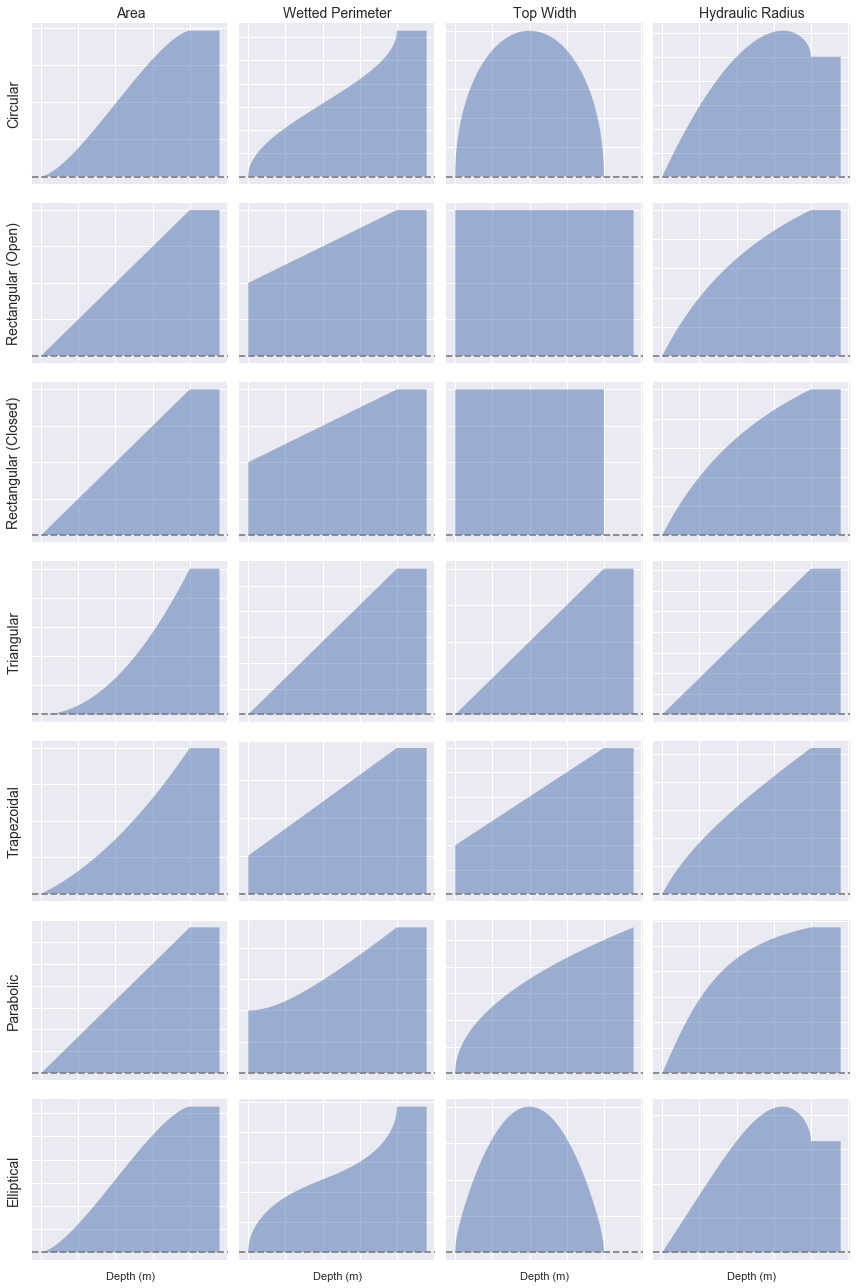

In [10]:
fig, ax = plt.subplots(7, 4, figsize=(12, 18))

g1 = np.ones(len(h))
ax[0,0].fill_between(h, circular.A_ik(h, h, g1), alpha=0.5)
ax[0,1].fill_between(h, circular.Pe_ik(h, h, g1), alpha=0.5)
ax[0,2].fill_between(h, circular.B_ik(h, h, g1), alpha=0.5)
ax[0,3].fill_between(h, circular.R_ik(circular.A_ik_alt(h, h, g1),
                              circular.Pe_ik(h, h, g1)), alpha=0.5)

g1 = np.ones_like(h)
g2 = 2 * np.ones_like(h)
ax[1,0].fill_between(h, rect_open.A_ik(h, h, g1, g2), alpha=0.5)
ax[1,1].fill_between(h, rect_open.Pe_ik(h, h, g1, g2), alpha=0.5)
ax[1,2].fill_between(h, rect_open.B_ik(h, h, g1, g2), alpha=0.5)
ax[1,3].fill_between(h, rect_open.R_ik(rect_open.A_ik(h, h, g1, g2),
                               rect_open.Pe_ik(h, h, g1, g2)), alpha=0.5)

g1 = np.ones_like(h)
g2 = 2 * np.ones_like(h)
ax[2,0].fill_between(h, rect_closed.A_ik(h, h, g1, g2), alpha=0.5)
ax[2,1].fill_between(h, rect_closed.Pe_ik(h, h, g1, g2), alpha=0.5)
ax[2,2].fill_between(h, rect_closed.B_ik(h, h, g1, g2), alpha=0.5)
ax[2,3].fill_between(h, rect_closed.R_ik(rect_closed.A_ik(h, h, g1, g2),
                                 rect_closed.Pe_ik(h, h, g1, g2)), alpha=0.5)

g1 = np.ones_like(h)
g2 = np.ones_like(h)
ax[3,0].fill_between(h, triangular.A_ik(h, h, g1, g2), alpha=0.5)
ax[3,1].fill_between(h, triangular.Pe_ik(h, h, g1, g2), alpha=0.5)
ax[3,2].fill_between(h, triangular.B_ik(h, h, g1, g2), alpha=0.5)
ax[3,3].fill_between(h, triangular.R_ik(triangular.A_ik(h, h, g1, g2),
                                triangular.Pe_ik(h, h, g1, g2)), alpha=0.5)

g1 = np.ones_like(h)
g2 = np.ones_like(h)
g3 = np.ones_like(h)
ax[4,0].fill_between(h, trapezoidal.A_ik(h, h, g1, g2, g3), alpha=0.5)
ax[4,1].fill_between(h, trapezoidal.Pe_ik(h, h, g1, g2, g3), alpha=0.5)
ax[4,2].fill_between(h, trapezoidal.B_ik(h, h, g1, g2, g3), alpha=0.5)
ax[4,3].fill_between(h, trapezoidal.R_ik(trapezoidal.A_ik(h, h, g1, g2, g3),
                                 trapezoidal.Pe_ik(h, h, g1, g2, g3)), alpha=0.5)

g1 = np.ones_like(h)
g2 = np.ones_like(h)
ax[5,0].fill_between(h, parabolic.A_ik(h, h, g1, g2), alpha=0.5)
ax[5,1].fill_between(h, parabolic.Pe_ik(h, h, g1, g2), alpha=0.5)
ax[5,2].fill_between(h, parabolic.B_ik(h, h, g1, g2), alpha=0.5)
ax[5,3].fill_between(h, parabolic.R_ik(parabolic.A_ik(h, h, g1, g2),
                               parabolic.Pe_ik(h, h, g1, g2)), alpha=0.5)

g1 = np.ones_like(h)
g2 = 2 * np.ones_like(h)
ax[6,0].fill_between(h, elliptical.A_ik(h, h, g1, g2), alpha=0.5)
ax[6,1].fill_between(h, elliptical.Pe_ik(h, h, g1, g2), alpha=0.5)
ax[6,2].fill_between(h, elliptical.B_ik(h, h, g1, g2), alpha=0.5)
ax[6,3].fill_between(h, elliptical.R_ik(elliptical.A_ik(h, h, g1, g2),
                                elliptical.Pe_ik(h, h, g1, g2)), alpha=0.5)

for i in range(ax.size):
    ax.flat[i].xaxis.set_ticklabels([])
    ax.flat[i].yaxis.set_ticklabels([])
    ax.flat[i].axhline(0, c='0.5', linestyle='--')

ax[0,0].set_title('Area', fontsize=14)
ax[0,1].set_title('Wetted Perimeter', fontsize=14)
ax[0,2].set_title('Top Width', fontsize=14)
ax[0,3].set_title('Hydraulic Radius', fontsize=14)

ax[0,0].set_ylabel('Circular', fontsize=14)
ax[1,0].set_ylabel('Rectangular (Open)', fontsize=14)
ax[2,0].set_ylabel('Rectangular (Closed)', fontsize=14)
ax[3,0].set_ylabel('Triangular', fontsize=14)
ax[4,0].set_ylabel('Trapezoidal', fontsize=14)
ax[5,0].set_ylabel('Parabolic', fontsize=14)
ax[6,0].set_ylabel('Elliptical', fontsize=14)

ax[6,0].set_xlabel('Depth (m)')
ax[6,1].set_xlabel('Depth (m)')
ax[6,2].set_xlabel('Depth (m)')
ax[6,3].set_xlabel('Depth (m)')

plt.tight_layout()